# 밑바닥부터 시작하는 딥러닝1 - 신경망 학습 (Chapter 4)

이 Notebook에서는 신경망 학습의 핵심 개념들을 다룹니다. 특히,

- **미니배치 학습**과 **확률적 경사 하강법(SGD)**
- **손실 함수** (오차 제곱합, 교차 엔트로피 오차)와 그 필요성
- **수치 미분 및 편미분**을 통한 기울기 산출
- **역전파(Backpropagation)**를 통한 기울기 계산 및 매개변수 갱신
- **안장점(Saddle Point)** 문제 등

또한, 2층 신경망 클래스를 직접 구현하고, MNIST 데이터셋을 활용하여 미니배치 학습 및 최종 평가까지 진행합니다.

아래의 각 섹션에서 이론과 구현을 함께 다루므로, 전문가 수준으로 이해할 수 있도록 상세하게 설명하겠습니다.

## 1. 손실 함수(Loss Function)와 그 필요성

손실 함수는 모델의 예측값과 실제 정답 간의 차이를 수치화하여 모델의 성능을 평가하는 데 사용됩니다. 

### (1) 오차 제곱합(Mean Squared Error, MSE)

MSE는 회귀 문제에서 주로 사용되며, 예측값과 실제 값의 차이를 제곱하여 평균을 내는 방식입니다.

$$ MSE = \frac{1}{m} \sum_{i=1}^{m}(y_{i}^{pred} - y_{i}^{true})^2 $$

### (2) 교차 엔트로피 오차(Cross-Entropy Loss)

분류 문제에서 사용되며, 모델이 출력한 확률 분포와 실제 분포(원-핫 인코딩된 정답) 사이의 차이를 측정합니다.

$$ L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{K} y_{ij}^{true} \log(y_{ij}^{pred}) $$

손실 함수를 사용하는 이유는, 이 값을 최소화하는 방향으로 모델의 가중치와 편향을 업데이트하여 학습을 진행하기 때문입니다.

## 1. 오차 제곱합(MSE)와 교차 엔트로피 오차(Cross-Entropy) 상세 설명

다음은 **오차 제곱합(Mean Squared Error, MSE)**와 **교차 엔트로피 오차(Cross-Entropy Loss)**에 대한 좀 더 자세한 설명입니다. 이 두 손실 함수는 머신러닝/딥러닝에서 모델의 예측과 실제 레이블 간의 차이를 측정하여, 학습 과정에서 모델이 오차를 최소화하도록 유도하는 핵심 역할을 합니다.

---

### 1. 오차 제곱합 (Mean Squared Error, MSE)

#### 1.1 정의와 수식

$$\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \bigl(y_i^{(\text{pred})} - y_i^{(\text{true})}\bigr)^2$$

- $m$: 데이터 샘플(배치)의 개수  
- $y_i^{(\text{pred})}$: 모델이 예측한 값  
- $y_i^{(\text{true})}$: 실제(정답) 값

#### 1.2 특징

1. **제곱으로 인한 큰 오차 강조**  
   $(y_i^{(\text{pred})} - y_i^{(\text{true})})^2$ 항이 있기 때문에, 예측과 실제 값의 차이가 클수록 손실이 급격히 증가합니다. 이는 큰 오차를 더욱 강하게 페널티 주어 모델이 이를 줄이도록 유도합니다.
2. **회귀 문제에서 자주 사용**  
   예측값이 **연속적인 실수**(예: 주가, 온도, 주택 가격)인 **회귀(regression)** 문제에서 가장 흔히 사용됩니다.
3. **미분과 해석이 간단**  
   $\text{MSE}$는 미분하기가 쉬우며, 기울기(gradient)가 단순한 형태로 나옵니다.
4. **민감도**  
   오차가 매우 큰 이상치(outlier)가 존재할 경우, MSE가 그 영향을 크게 받아 모델 파라미터가 과도하게 변화할 수 있습니다.

#### 1.3 장단점 요약

- **장점**:
  - 미분이 간단하며, 구현이 쉬움
  - 회귀 문제에서 널리 사용, 이론적 기반(최소제곱법 등)이 탄탄
- **단점**:
  - 이상치(Outlier)에 민감
  - 분류와 같은 범주형 예측에는 직접적인 확률 해석이 어려움

---

### 2. 교차 엔트로피 오차 (Cross-Entropy Loss)

#### 2.1 정의와 수식

분류 문제에서 주로 사용되며, 모델이 출력한 **확률 분포**와 **실제 정답(원-핫 인코딩)** 간의 차이를 측정합니다.

$$ L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{K} y_{ij}^{(\text{true})} \log\bigl(y_{ij}^{(\text{pred})}\bigr) $$

- $m$: 데이터 샘플(배치)의 개수  
- $K$: 분류 클래스 개수  
- $y_{ij}^{(\text{true})}$: 실제 레이블(원-핫 인코딩), 해당 클래스이면 1, 아니면 0  
- $y_{ij}^{(\text{pred})}$: 모델이 예측한 클래스 $j$일 확률

#### 2.2 특징

1. **확률 분포 간 차이 측정**  
   교차 엔트로피는 두 확률 분포 $p$와 $q$ 사이의 거리를 재는 지표로 볼 수 있습니다. 모델이 예측한 확률 분포와 실제 레이블(원-핫 분포) 간의 차이를 최소화하려고 합니다.
2. **분류 문제에서 널리 사용**  
   모델이 어떤 클래스일 확률을 출력한다고 가정할 때, **클래스가 정답일 확률을 최대화**(또는 손실 최소화)하기에 직관적이고 해석하기 쉽습니다.
3. **소프트맥스(Softmax)와의 결합**  
   - 모델의 출력(로짓)에 소프트맥스 함수를 적용해 확률을 만든 뒤, 그 확률을 교차 엔트로피로 비교합니다.
   - **소프트맥스 + 교차 엔트로피**는 분류 모델 학습에서 사실상 표준으로 쓰이는 조합입니다.
4. **기울기 안정성**  
   - 미분 시 $\log$ 함수로 인해 **출력이 0에 가까운 클래스**일수록 기울기가 크게 반영되어, 학습이 효율적으로 진행됩니다.
   - 예측 확률이 0에 매우 가까울 때, 수치 안정성 문제를 방지하기 위해 작은 $\epsilon$을 더하는 방식을 사용합니다.

#### 2.3 장단점 요약

- **장점**:
  - 분류 문제에서 확률 해석이 명확
  - 소프트맥스 함수와 결합 시, 모델이 정답 클래스를 '확실히' 맞추도록 학습
  - 미분이 간단해 실제 딥러닝 프레임워크에서 효율적으로 구현 가능
- **단점**:
  - 회귀 문제에는 사용하기 어려움
  - 예측 확률이 극단적으로 0 또는 1에 가까울 때 수치 안정성 문제 발생 가능

---

### 3. 손실 함수를 사용하는 이유

1. **모델 학습의 지표**: 손실 함수는 모델이 얼마나 '잘못 예측'하고 있는지를 한눈에 보여주는 척도입니다.
2. **파라미터 업데이트 방향 제시**: 역전파(Backpropagation) 시, 손실 함수를 미분하여 모델의 가중치와 편향을 어느 방향으로 얼마나 조정해야 하는지 알 수 있습니다.
3. **오차 최소화**: 손실 함수를 최소화하는 방향으로 반복 학습(경사 하강법 등)을 진행하면, 결과적으로 모델이 더 정확한 예측을 하도록 유도합니다.

---

### 4. 어느 상황에서 어떤 손실 함수를 쓰나?

1. **회귀 문제**:
   - 예측값이 실수 범위 (예: 주택 가격, 주가 예측)
   - **오차 제곱합(MSE)**나 **MAE(Mean Absolute Error)** 등이 주로 사용
   - 선형 회귀, 회귀용 딥러닝 모델 등
2. **분류 문제**:
   - 예측값이 클래스 확률 (예: 고양이 vs 개, 10종 이미지 분류)
   - **교차 엔트로피(Cross-Entropy)** + **소프트맥스** 조합이 사실상 표준
   - 로지스틱 회귀(이진 분류), 신경망 분류(다중 클래스) 등
3. **확률적 해석**:
   - 분류 모델에서 확률을 다룰 때, 교차 엔트로피가 이론적으로 자연스러움
   - 회귀 문제에서는 연속 값 오차 측정이 중요하므로 MSE 등을 사용

---

### 5. 정리

- **오차 제곱합(MSE)**:
  - 회귀 문제에서 널리 사용되는 기본 손실 함수
  - 예측과 실제 값의 차이를 제곱해 평균함
  - 이상치에 민감하지만 계산이 간단하고, 선형 회귀와 같은 이론적 기반이 탄탄

- **교차 엔트로피 오차(Cross-Entropy Loss)**:
  - 분류 문제에서 가장 많이 사용되는 손실 함수
  - 모델이 출력한 확률과 실제 레이블(원-핫) 간의 차이를 로그로 측정
  - 소프트맥스와 결합해 확률적 해석이 용이하며, 학습 효율이 좋음

손실 함수는 모델이 '어떤 기준으로' 오차를 측정하고 개선해 나갈지 결정하는 핵심 요소입니다. 올바른 손실 함수를 선택하면 모델의 성능과 학습 안정성이 크게 향상될 수 있습니다.


In [ ]:
# 아래 코드는 교차엔트로피 오차 (분류 문제에서 사용하는 손실 함수)
import numpy as np

def mean_squared_error(y_pred, y_true):
    m = y_true.shape[0]
    return np.sum((y_pred - y_true) ** 2) / m

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    # 작은 값 추가하여 log 안정성 확보
    eps = 1e-12
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.sum(y_true * np.log(y_pred)) / m

# 간단한 테스트
logits = np.array([0.5, 2.0, 3.0])
def softmax(x):
    x_stable = x - np.max(x)
    exp_x = np.exp(x_stable)
    return exp_x / np.sum(exp_x)

probs = softmax(logits)
print('Softmax probabilities:', probs)

# 원-핫 인코딩된 정답 (예: 클래스 2가 정답)
y_true = np.array([0, 0, 1])
print('Cross-Entropy Loss:', cross_entropy_loss(np.array([probs]), np.array([y_true])))

Softmax probabilities: [0.05661173 0.25371618 0.68967209]
Cross-Entropy Loss: 0.3715390318526828


## 2. 수치 미분 및 편미분 (Numerical Differentiation and Partial Derivatives)

수치 미분은 미분의 근사값을 구하는 방법으로, 주로 수치적 안정성을 위해 사용됩니다. 

예를 들어, 함수 \( f(x) \)의 미분은 중앙 차분법을 이용해 다음과 같이 근사할 수 있습니다:

$$ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} $$

이 방법은 여러 변수의 경우 편미분(partial derivative)에도 적용되며, 이를 통해 각 파라미터에 대한 기울기를 계산할 수 있습니다.

또한, 수치 미분은 역전파를 구현할 때 계산된 기울기가 올바른지 검증하는 데에도 사용됩니다.

**안장점(Saddle Point)** 문제: 신경망 최적화에서 기울기가 0에 가까워지는 지점이지만, 실제로는 최저점이나 최고점이 아닌 경우가 있습니다. 이를 해결하기 위해 학습률 조정 및 모멘텀 기법 등이 사용됩니다.

Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub4f1' [U+b4f1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uace0' [U+ace0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubc0f' [U+bc0f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3b8' [U+d3b8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubbf8' [U+bbf8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubca1' [U+bca1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud130' [U+d130], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc758' [U+c758], 

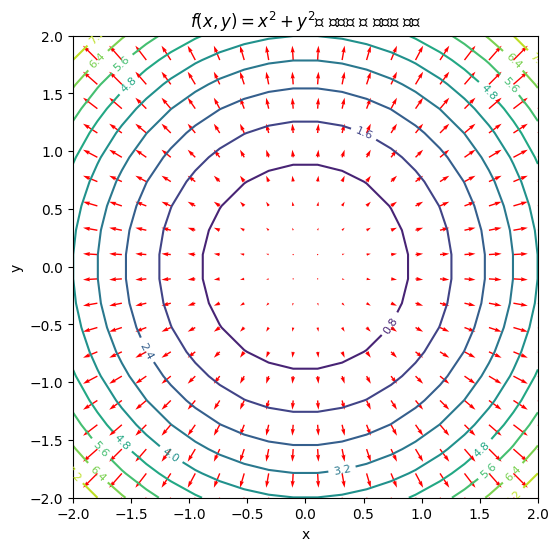

Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud45c' [U+d45c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uba74' [U+ba74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud45c' [U+d45c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uba74' [U+ba74], substituting with a dummy symbol.


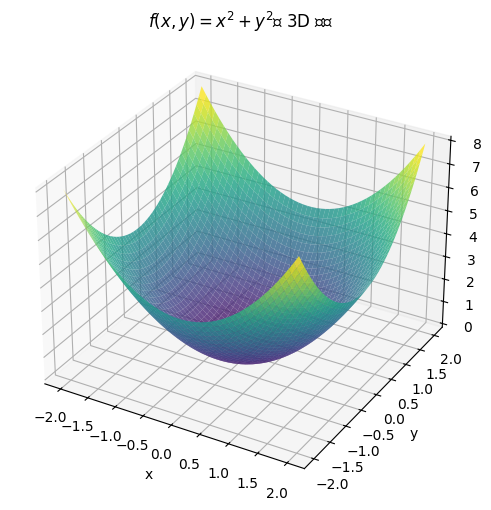

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 예시 함수 f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# 편미분 (∂f/∂x, ∂f/∂y)
def fx(x, y):
    return 2*x

def fy(x, y):
    return 2*y

# 1. 2D에서 등고선 + 편미분 벡터(기울기) 시각화
def plot_partial_derivatives_2d():
    x_vals = np.linspace(-2, 2, 20)
    y_vals = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)   # 함수값
    Fx = fx(X, Y) # ∂f/∂x
    Fy = fy(X, Y) # ∂f/∂y

    plt.figure(figsize=(6,6))
    # 등고선(Contour) 그리기
    cs = plt.contour(X, Y, Z, levels=10, cmap='viridis')
    plt.clabel(cs, inline=True, fontsize=8)
    
    # 편미분 벡터(기울기 벡터) 표시 (quiver)
    plt.quiver(X, Y, Fx, Fy, color='red')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r"$f(x,y) = x^2 + y^2$의 등고선 및 편미분 벡터")
    plt.grid(False)
    plt.show()

# 2. 3D 표면 그래프 시각화
def plot_surface_3d():
    x_vals = np.linspace(-2, 2, 50)
    y_vals = np.linspace(-2, 2, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title(r"$f(x,y) = x^2 + y^2$의 3D 표면")
    plt.show()

# 실행
plot_partial_derivatives_2d()
plot_surface_3d()


In [24]:
def numerical_gradient(f, x, h=1e-4):
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x + h)
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x - h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 원래 값 복원
        it.iternext()
    return grad

# 예제 함수: f(x) = x^2
f = lambda x: np.sum(x ** 2)
x = np.array([3.0, 4.0])
grad = numerical_gradient(f, x)
print('Numerical gradient of f(x)=x^2 at x=[3,4]:', grad)

Numerical gradient of f(x)=x^2 at x=[3,4]: [6. 8.]


## 3. 미니배치 학습 및 확률적 경사 하강법 (SGD)

전체 데이터셋을 사용한 학습(배치 학습)과 달리, 미니배치 학습은 데이터셋을 작은 배치로 나누어 학습합니다. 

- **미니배치 학습**: 전체 데이터 중 일부 배치(batch)를 선택하여 기울기와 손실을 계산하고 파라미터를 업데이트합니다.
- **확률적 경사 하강법 (Stochastic Gradient Descent, SGD)**: 미니배치 단위로 무작위 샘플링하여 매 업데이트마다 파라미터를 갱신합니다.

이 방식은 메모리 사용량을 줄이고, 지역 최소값에 빠지지 않도록 도와주는 등 여러 장점이 있습니다.

In [20]:
def get_mini_batches(X, Y, batch_size=64):
    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    for i in range(0, m, batch_size):
        batch_idx = indices[i:i+batch_size]
        yield X[batch_idx], Y[batch_idx]

# 예제: 간단한 미니배치 추출 테스트
X_dummy = np.arange(100).reshape(20, 5)  # 20개의 샘플, 5차원 입력
Y_dummy = np.arange(20).reshape(20, 1)
for X_batch, Y_batch in get_mini_batches(X_dummy, Y_dummy, batch_size=6):
    print('Batch X shape:', X_batch.shape, 'Batch Y shape:', Y_batch.shape)

Batch X shape: (6, 5) Batch Y shape: (6, 1)
Batch X shape: (6, 5) Batch Y shape: (6, 1)
Batch X shape: (6, 5) Batch Y shape: (6, 1)
Batch X shape: (2, 5) Batch Y shape: (2, 1)


## 4. TwoLayerNet 클래스 구현

아래에서는 2층 신경망(입력층 → 은닉층 → 출력층)을 구현한 클래스를 소개합니다. 

주요 구성요소:

- **초기화:** 가중치와 편향을 무작위로 초기화합니다.
- **순전파:** 은닉층과 출력층을 거쳐 예측값(softmax 확률)을 계산합니다.
- **손실 함수:** 교차 엔트로피 오차를 사용하여 손실을 계산합니다.
- **역전파:** 순전파에서 저장한 캐시를 활용해 각 파라미터에 대한 기울기를 계산합니다.
- **예측:** 학습된 모델로부터 클래스 예측 결과를 반환합니다.

이 클래스는 미니배치 학습과 함께 사용되어, MNIST와 같은 대규모 데이터셋에 대해 학습 및 평가가 가능합니다.

In [21]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros((1, hidden_size))
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros((1, output_size))

    def predict(self, X):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        a1 = np.dot(X, W1) + b1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = self.softmax(a2)
        return y

    def loss(self, X, t):
        y = self.predict(X)
        return self.cross_entropy_error(y, t)

    def accuracy(self, X, t):
        y = self.predict(X)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(X.shape[0])
        return accuracy

    def gradient(self, X, t):
        # 순전파
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        batch_num = X.shape[0]

        # forward
        a1 = np.dot(X, W1) + b1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = self.softmax(a2)

        # backward
        grads = {}
        dy = (y - t) / batch_num

        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0, keepdims=True)

        dz1 = np.dot(dy, W2.T)
        da1 = dz1 * self.sigmoid_derivative(a1)
        grads['W1'] = np.dot(X.T, da1)
        grads['b1'] = np.sum(da1, axis=0, keepdims=True)

        return grads

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return TwoLayerNet.sigmoid(x) * (1 - TwoLayerNet.sigmoid(x))

    @staticmethod
    def softmax(x):
        if x.ndim == 2:
            x = x - np.max(x, axis=1, keepdims=True)
            exp_x = np.exp(x)
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)
        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))

    @staticmethod
    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        # 정답 레이블이 원-핫 인코딩이 아닐 경우
        if t.size == y.size:
            t = np.argmax(t, axis=1)
        batch_num = y.shape[0]
        eps = 1e-7
        return -np.sum(np.log(y[np.arange(batch_num), t] + eps)) / batch_num


## 5. MNIST 데이터셋을 활용한 미니배치 학습 및 평가

다음 섹션에서는 Keras를 사용하여 MNIST 데이터셋을 불러오고, 전처리한 후 TwoLayerNet을 사용하여 미니배치 학습을 수행합니다. 

학습 과정에서는 매 에포크마다 학습 손실과 테스트 정확도를 계산하고, 이를 시각화합니다.

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리: flatten, 정규화, 원-핫 인코딩
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)


Train data shape: (60000, 784)
Test data shape: (10000, 784)


## 6. 학습 루프 및 성능 평가

아래 코드는 미니배치 학습을 수행하는 학습 루프를 구현한 것입니다.

- **미니배치 생성:** 앞서 구현한 `get_mini_batches` 함수를 사용합니다.
- **매 에포크마다 손실과 정확도 계산:** 학습 데이터와 테스트 데이터에서 성능을 평가합니다.
- **학습 과정 시각화:** 에포크별 손실과 정확도 그래프를 출력합니다.

In [23]:
# 학습 하이퍼파라미터
iters_num = 5000
batch_size = 128
learning_rate = 0.1

train_loss_list = []
test_acc_list = []

net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 추출
    for X_batch, Y_batch in get_mini_batches(X_train, y_train_onehot, batch_size):
        # 기울기 계산
        grads = net.gradient(X_batch, Y_batch)
        # 파라미터 업데이트
        for key in net.params:
            net.params[key] -= learning_rate * grads[key]

    # 매 에포크마다 손실과 정확도 측정
    if i % 100 == 0:
        loss = net.loss(X_train, y_train_onehot)
        train_loss_list.append(loss)
        test_acc = net.accuracy(X_test, y_test)
        test_acc_list.append(test_acc)
        print(f"Iteration {i}: Loss = {loss:.4f}, Test Accuracy = {test_acc:.4f}")

# 학습 손실 그래프
plt.figure(figsize=(8,4))
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Iteration (per 100)')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

# 테스트 정확도 그래프
plt.figure(figsize=(8,4))
plt.plot(test_acc_list, label='Test Accuracy', color='orange')
plt.xlabel('Iteration (per 100)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Iterations')
plt.legend()
plt.show()

Iteration 0: Loss = 1.0965, Test Accuracy = 0.7117


KeyboardInterrupt: 

## 7. 결론

이번 Notebook에서는 다음과 같은 내용을 다루었습니다:

- **손실 함수**: 오차 제곱합과 교차 엔트로피 오차의 개념과 구현
- **수치 미분 및 편미분**: 기울기 산출의 기초
- **미니배치 학습** 및 **확률적 경사 하강법 (SGD)**: 전체 데이터를 한 번에 처리하지 않고, 작은 배치로 나누어 학습하는 방법
- **2층 신경망(TwoLayerNet) 클래스**: 순전파, 역전파, 손실 계산, 그리고 파라미터 업데이트를 포함한 신경망 구현
- **MNIST 데이터셋**을 이용한 실제 학습 및 평가, 학습 과정의 시각화

이 과정을 통해 신경망의 학습 원리와 실제 구현 방법을 체계적으로 이해할 수 있으며, 미니배치와 SGD의 장점, 손실 함수의 역할, 그리고 역전파를 통한 기울기 계산의 중요성을 확인할 수 있습니다.